# Roberry and Burglary per capita
This notebook is dedicated to determining which of the Pittsburgh neighborhoods has the least number of robberies and burglaris per capita. That is, for every person in a neighborhood, how many people have been robbed or bugled in that neighborhood?

Using the population from the 2010 census, and the number of each crime from 2010, we can determine which neighborhood you are least likely to get stolen from in!

I'll start, as always, by importing pandas and reading the CSV (`demographics.csv`) into a dataframe

In [1]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

demos = pd.read_csv("demographics.csv")

demos.head()

,_id,FID,Neighborhood_2010_FID_BlockG,Neighborhood_2010_STATEFP10,Neighborhood_2010_COUNTYFP10,Neighborhood_2010_TRACTCE10,Neighborhood_2010_BLKGRPCE10,Neighborhood_2010_GEOID10,Neighborhood_2010_NAMELSAD10,Neighborhood_2010_MTFCC10,...,SNAP_All_csv_Commute_to_Work__C,SNAP_All_csv_Commute_to_Work__P,SNAP_All_csv_Commute_to_Work__T,SNAP_All_csv_Commute_to_Work__M,SNAP_All_csv_Commute_to_Work__B,SNAP_All_csv_Commute_to_Work__W,SNAP_All_csv_Commute_to_Work__O,SNAP_All_csv_Work_at_Home__2010,SHAPE_Length,SHAPE_Area
0,1,1,0,42,3,40500,1,420030405001,Block Group 1,G5030,...,6.9%,13.3%,0.0%,0.0%,0.0%,62.4%,0.0%,1.2%,11525.904546,7.842997e+06
1,2,2,1,42,3,40400,1,420030404001,Block Group 1,G5030,...,7.2%,11.5%,0.4%,0.0%,2.9%,52.6%,0.4%,4.4%,20945.562570,1.390469e+07
2,3,3,2,42,3,40200,2,420030402002,Block Group 2,G5030,...,1.0%,22.1%,0.0%,0.0%,0.0%,40.8%,0.7%,0.0%,18280.484515,5.998649e+06
3,4,4,3,42,3,30500,2,420030305002,Block Group 2,G5030,...,9.6%,16.5%,2.0%,0.0%,0.0%,6.5%,0.0%,0.0%,15694.771444,7.203631e+06
4,5,5,5,42,3,20300,1,420030203001,Block Group 1,G5030,...,19.1%,18.1%,0.0%,0.0%,0.0%,0.0%,0.0%,9.0%,24019.532672,1.694875e+07


While all this data is certainly fun, we only need the Robbery count, the Burglary count, the population, and the Neighborhood for this submetric:

In [2]:

cols_to_keep = ["SNAP_All_csv__Robbery__2010_", 
                "SNAP_All_csv__Burglary__2010_", 
                "SNAP_All_csv_Neighborhood", 
                "Pop__2010"
               ]
crime_stats = demos[cols_to_keep]

crime_stats.head()

,SNAP_All_csv__Robbery__2010_,SNAP_All_csv__Burglary__2010_,SNAP_All_csv_Neighborhood,Pop__2010
0,23,66,Central Oakland,6086
1,16,35,North Oakland,10551
2,13,14,West Oakland,2604
3,16,20,Crawford-Roberts,2256
4,12,20,Strip District,616


Now let's compile all that down into crimes per capita:

In [3]:
crime_pc = dict()
neighborhood = "SNAP_All_csv_Neighborhood"
robbery = "SNAP_All_csv__Robbery__2010_"
burglary = "SNAP_All_csv__Burglary__2010_"
population = "Pop__2010"
for idx, row in crime_stats.iterrows():
    crime_pc[row[neighborhood]] = (row[robbery] + row[burglary])/row[population] # crime per capita is defined as the sum of robberies and burglaries divided by the population of the neighborhood



Let's put that back into a dataframe so we can get some more info out of it:

In [4]:
final_stats = pd.DataFrame.from_dict(crime_pc, orient="index", columns=["Crime Per Capita"])
final_stats.index.name = "Neighborhood"
final_stats.head()

,Crime Per Capita
Neighborhood,
Central Oakland,0.014624
North Oakland,0.004834
West Oakland,0.010369
Crawford-Roberts,0.015957
Strip District,0.051948


Let's sort it now:

In [5]:
sorted_stats = final_stats.sort_values(by="Crime Per Capita", ascending=True)

And the winner is...

In [6]:
sorted_stats.iloc[0]

Crime Per Capita    0.000998
Name: Fairywood, dtype: float64

Fairywood! Good for Fairywood. As for the rest of the neighborhoods, let's look at a map (remember, darker means MORE crime):

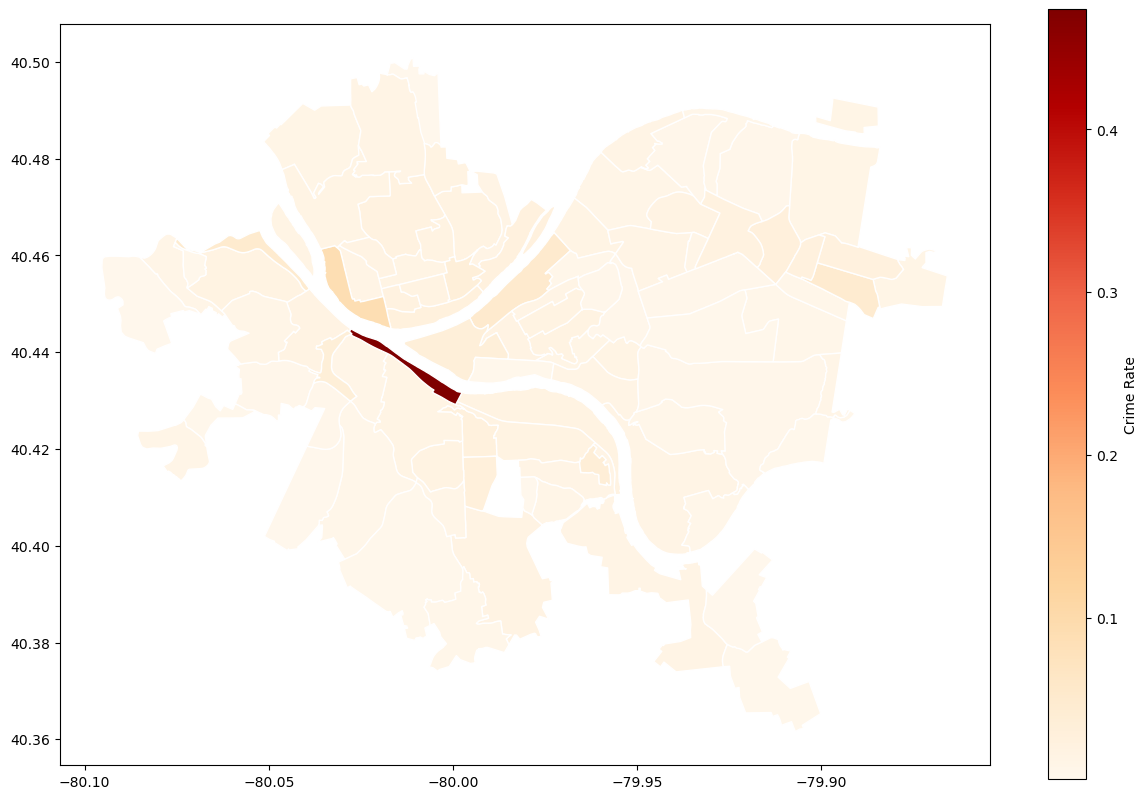

In [7]:
nbhd = geopandas.read_file("../Neighborhoods/Neighborhoods_.shp")
mapped_data = nbhd.merge(sorted_stats, left_on="hood", right_on="Neighborhood", how="left")
mapped_data.plot(column="Crime Per Capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

What's going on in South Shore? That's nearly a theft for half the entire neighborhood!

Finally, lets save these results to a new CSV so we can put them all together at the end:

In [8]:
sorted_stats.to_csv("crime_pc.csv", index=True)